In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
# Load dataset
data = pd.read_csv("/Users/dhruvpai/Downloads/Datasets for practicals/uber.csv")

In [9]:
# Data Preprocessing
data.dropna(inplace=True)
data = data[(data['fare_amount'] >= 2.5) & (data['fare_amount'] <= 100)]  # Remove outliers in fare

In [10]:
# Feature and target separation
X = data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
y = data['fare_amount']

In [6]:
# Dropping unnecessary columns
data = data.drop(['pickup_datetime', 'key'], axis=1)

In [7]:
# Handling missing values
data.dropna(inplace=True)

In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1)
}

In [13]:
# Train, predict, and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "R2 Score": r2_score(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
    }
    print(f"{name} - R2 Score: {results[name]['R2 Score']:.2f}, RMSE: {results[name]['RMSE']:.2f}")


Linear Regression - R2 Score: 0.00, RMSE: 9.33
Ridge Regression - R2 Score: 0.00, RMSE: 9.33
Lasso Regression - R2 Score: 0.00, RMSE: 9.33


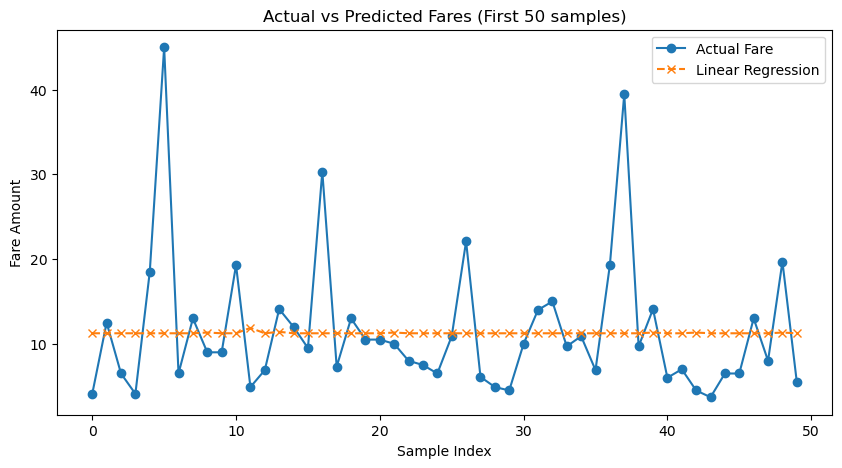

In [14]:
# Visualization of Actual vs Predicted (First 50 samples)
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:50], label="Actual Fare", marker='o')
plt.plot(models["Linear Regression"].predict(X_test)[:50], label="Linear Regression", linestyle="--", marker='x')
plt.xlabel("Sample Index")
plt.ylabel("Fare Amount")
plt.legend()
plt.title("Actual vs Predicted Fares (First 50 samples)")
plt.show()

Data Loading and Preprocessing:

Loads the dataset, removes rows with missing values, and filters out extreme fare values to simplify the dataset. Feature Selection:

Uses basic location and passenger count features for prediction. This is a simplified selection to maintain model focus on key variables Train-Test Split:

Splits the data into training and testing sets for model evaluation. Model Training and Evaluation:

Trains linear, Ridge, and Lasso regression models. Each model is evaluated using R2 and RMSE metrics to measure prediction accuracy. Visualization:

Plots the actual vs. predicted fare values for the first 50 samples using Linear Regression predictions for simplicity.